# Basics

Calculating output of a neuron based on its inputs, weights and bias

In [8]:
import random

In [9]:
inputs = [1,2,3,4]
weights = [3, -1, 2, 0]
bias = 3.9

In [10]:
def get_neuron_output(inputs: list, weights: list, bias: float) -> float:
    return sum(
        input * weight for input, weight in zip(inputs, weights)
    ) + bias

In [11]:
get_neuron_output(inputs, weights, bias)

10.9

## Computing outputs for a layer of neurons

In [16]:
class Neuron(object):
    INPUTS: list
    WEIGHTS: list
    BIAS: float
        
    def __init__(self, inputs: list, weights: list, bias: list):
        self.INPUTS = inputs
        self.WEIGHTS = weights
        self.BIAS = bias
        
    def get_output(self):
        return sum(
            input * weight for input, weight in zip(inputs, weights)
        ) + bias

In [20]:
num_of_neurons = 5
num_of_inputs = 4

inputs = [random.uniform(1, 5) for _ in range(num_of_inputs)] # Generate random inputs
print(f'Using {", ".join(map(str, inputs))} ({len(inputs)}) inputs')

outputs = []

for _ in range(num_of_neurons):
    # Generate random weights
    weights = [random.uniform(2, 4) for _ in range(num_of_inputs)]
    bias = random.random()
    neuron = Neuron(inputs, weights, bias)
    outputs.append(neuron.get_output())

print(f'Resulting output from neurons is \n\t{outputs}')


Using 2.3678419348498503, 1.0703110994839111, 4.616641817047384, 2.1147813100132278 (4) inputs
Resulting output from neurons is 
	[29.276998513894497, 30.80513989550513, 35.0785962807766, 29.528920623837276, 32.18641424038266]


## Calculating dot product of vectors

In [23]:
def dot(a: list, b: list):
    assert len(a) == len(b), 'Input vectors must be equal in lenght'
    return sum([a_i * b_i for a_i, b_i in zip(a, b)])

In [24]:
a = [1,2,3]
b = [2,3,4]

dot(a,b)

20

Since dot product is essentially what we do when we compute neuron output by multiplying weights by inputs (without adding bias), we can rewrite the neuron class to use it. We will use numpy

In [26]:
import numpy as np

In [27]:
class Neuron(object):
    INPUTS: list
    WEIGHTS: list
    BIAS: float
        
    def __init__(self, inputs: list, weights: list, bias: list):
        self.INPUTS = inputs
        self.WEIGHTS = weights
        self.BIAS = bias
        
    def get_output(self):
        return np.dot(inputs, weights) + bias

In [28]:
inputs = [1.0, 2.0, 3.0, 2.5]
weights = [0.2, 0.8, -0.5, 1.0]
bias = 2.0

Neuron(inputs, weights, bias).get_output()

4.8

Now let's represent weights as matrices and compute the outputs of neurons using numpy:

In [36]:
inputs = [1.0, 2.0, 3.0, 2.5]
weights = [
    [0.2,    0.8,  -0.5,    1],
    [0.5,   -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]
]
biases = [2.0, 3.0, 0.5]
# The first argument of np.dot determines the way it will work
layer_output = np.dot(weights, inputs) + biases
print(layer_output)

[4.8   1.21  2.385]


In order to get better performance from the neural network and reduce training time, we might pass in batches of samples instead of one sample at a time. To do that, we'll use matrices

In [47]:
# define the params as matrices
inputs = np.array([
    [1.0, 2.0, 3.0, 2.5],
    [2.0, 5.0, -1.0, 2],
    [-1.5, 2.7, 3.3, -0.8],
])

weights = np.array([
    [0.2,    0.8,  -0.5,    1],
    [0.5,   -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]
]).T

biases = [2.0, 3.0, 0.5]

output = np.dot(inputs, weights) + biases
print(output)

[[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]


## Adding hidden layers

In [51]:
# Specify inputs. Let's think that they came from the input layer
inputs = np.array([
    [1.0, 2.0, 3.0, 2.5],
    [2.0, 5.0, -1.0, 2],
    [-1.5, 2.7, 3.3, -0.8],
])

# Define weights for the first "hidden" layer and transpose them immediately
weights_1 = np.array([
    [0.2,    0.8,  -0.5,    1],
    [0.5,   -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]
]).T

# Define biases for the first "hidden" layer
biases_1 = [2.0, 3.0, 0.5]

# Calculate the output of the layer
output_1 = np.dot(inputs, weights_1) + biases_1

print(f'Layer 1 has the following output:\n{output_1}\n')

# Now it's time to specify weights and biases for the second "hidden" layer

# Define weights for the second "hidden" layer and transpose them immediately
weights_2 = np.array([
    [0.1, -0.14, 0.5],
    [-0.5, 0.12, -0.33],
    [-0.44, 0.73, -0.13]
]).T

# Define biases for the second "hidden" layer
biases_2 = [-1, 2, -0.5]

# Now compute the output of the second hidden layer. We use matrix of outputs from our first hidden layer as the input
# for the second one
output_2 = np.dot(output_1, weights_2) + biases_2

print(f'Layer 2 has the following output:\n{output_2}')

Layer 1 has the following output:
[[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]

Layer 2 has the following output:
[[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]


## Training data

In [54]:
!pip install nnfs

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from nnfs.datasets import spiral_data
import nnfs # This package is imported so the results are consistent with the book
nnfs.init()

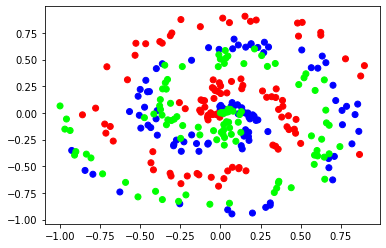

In [65]:
X, y = spiral_data(samples=100, classes=3)
plt.scatter(X[:,0], X[:,1], c=y, cmap='brg')
plt.show()

## Creating Dense layer class

In [82]:
class Dense(object):
    
    def __init__(self, inputs: int, neurons: int):
        # Initialize weights randomly
        # Each COLUMN in the resulting matrix is a neuron's weights
        # It is done to avoid transposing the weights matrix every time we make a forward pass
        # np.random.randn produces a Gaussian distribution with mean of 0 and variance of 1
        self.weights = 0.01 * np.random.randn(inputs, neurons)
        # Biases default to zero
        self.biases = np.zeros((1, neurons))
    
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases
        return self.output

In [88]:
# Create a dataset
x, y = spiral_data(samples=100, classes=3)
print(f'Shape of input data: {x.shape}')
print(x[:5])

dense_1 = Dense(inputs=2, neurons=3)
output = dense_1.forward(x)
print(f'\nShape of output data: {output.shape}')
print(output[:5])

Shape of input data: (300, 2)
[[-0.00000000e+00  0.00000000e+00]
 [ 1.37348089e-03  1.00071952e-02]
 [-1.44654105e-05  2.02020146e-02]
 [ 1.50569687e-02  2.62975544e-02]
 [ 1.24119539e-02  3.84503566e-02]]

Shape of output data: (300, 3)
[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [-1.3084782e-04 -2.7931663e-05 -1.3951084e-04]
 [-3.1899303e-04 -6.8864749e-05 -2.6318090e-04]
 [-1.1859162e-04 -2.2151436e-05 -4.4242095e-04]
 [-3.6236181e-04 -7.5380311e-05 -5.8328360e-04]]
